In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
%matplotlib inline
sns.set_style(style='whitegrid')

In [3]:
import binance_framework as bf

In [58]:
#Note: BCH HAS MANY NULL VALUES, BETTER NOT INCLUDE IT
currencies = ['BTCUSDT', 'ETHUSDT', 'LTCUSDT', 'XRPUSDT']
coins = pd.read_csv('bitcoin_datasets/interval_30min.csv')

In [59]:
bf.show_time_skips(coins, currencies)

Time difference:  30600000 BTCUSDT
time 1:  1565863200000 385
time 2:  1565832600000 384
Time difference:  30600000 ETHUSDT
time 1:  1565863200000 385
time 2:  1565832600000 384
Time difference:  30600000 LTCUSDT
time 1:  1565863200000 385
time 2:  1565832600000 384
Time difference:  30600000 XRPUSDT
time 1:  1565863200000 385
time 2:  1565832600000 384
Time difference:  9000000 BTCUSDT
time 1:  1573617600000 4689
time 2:  1573608600000 4688
Time difference:  9000000 ETHUSDT
time 1:  1573617600000 4689
time 2:  1573608600000 4688
Time difference:  9000000 LTCUSDT
time 1:  1573617600000 4689
time 2:  1573608600000 4688
Time difference:  9000000 XRPUSDT
time 1:  1573617600000 4689
time 2:  1573608600000 4688
Time difference:  9000000 BTCUSDT
time 1:  1574654400000 5261
time 2:  1574645400000 5260
Time difference:  9000000 ETHUSDT
time 1:  1574654400000 5261
time 2:  1574645400000 5260
Time difference:  9000000 LTCUSDT
time 1:  1574654400000 5261
time 2:  1574645400000 5260
Time differenc

In [60]:
bf.keep_one_timestamp(coins,currencies)

In [61]:
coins.head()

,Unnamed: 0,BTCUSDT Open,BTCUSDT High,BTCUSDT Low,BTCUSDT Close,BTCUSDT Volume,BTCUSDT Quote asset volume,BTCUSDT n_trades,BTCUSDT Taker buy base asset volume,BTCUSDT Taker buy quote asset volume,...,XRPUSDT High,XRPUSDT Low,XRPUSDT Close,XRPUSDT Volume,XRPUSDT Quote asset volume,XRPUSDT n_trades,XRPUSDT Taker buy base asset volume,XRPUSDT Taker buy quote asset volume,XRPUSDT Ignore,Timestamp
0,0,11553.85,11575.94,11507.38,11526.89,656.640105,7.583090e+06,7926,348.751797,4.027613e+06,...,0.31267,0.31151,0.31194,813025.6,253732.809574,1240,333116.0,103965.305052,0,1565143199999
1,1,11526.41,11605.36,11521.78,11599.02,898.978989,1.041019e+07,9217,569.436778,6.594922e+06,...,0.31273,0.31160,0.31247,709973.7,221688.466179,1161,353963.8,110558.180061,0,1565144999999
2,2,11599.02,11694.02,11595.49,11642.31,1246.597465,1.452507e+07,12250,601.608124,7.009442e+06,...,0.31322,0.31240,0.31279,725783.0,227012.329111,1250,333893.4,104433.582225,0,1565146799999
3,3,11645.26,11670.00,11566.42,11584.82,1051.269398,1.221591e+07,10124,698.846686,8.122098e+06,...,0.31329,0.31205,0.31233,658995.6,206058.917099,1473,301353.9,94239.994702,0,1565148599999
4,4,11583.12,11649.38,11550.00,11640.43,970.668827,1.125256e+07,9867,539.844349,6.259183e+06,...,0.31319,0.31209,0.31296,858944.3,268517.971170,1447,477992.0,149437.823676,0,1565150399999


In [10]:
"""#make all timestamps datatime objects
coins['Timestamp'] = coins['Timestamp'].apply(
    lambda x: datetime.fromtimestamp(int(x/1000)))"""

In [11]:
"""print('Data timeframe:')
print( 'From:  ',coins['Timestamp'].max())
print( 'To     ',coins['Timestamp'].min())"""

Data timeframe:
From:   2020-03-02 19:29:59
To      2019-11-19 11:59:59


In [65]:
"""#make all other columns numerical values
for i in coins.columns:
    if i != 'Timestamp':
        coins[i] = coins[i].astype(float)"""

"#make all other columns numerical values\nfor i in coins.columns:\n    if i != 'Timestamp':\n        coins[i] = coins[i].astype(float)"

In [66]:
coins.set_index('Timestamp')

,Unnamed: 0,BTCUSDT Open,BTCUSDT High,BTCUSDT Low,BTCUSDT Close,BTCUSDT Volume,BTCUSDT Quote asset volume,BTCUSDT n_trades,BTCUSDT Taker buy base asset volume,BTCUSDT Taker buy quote asset volume,...,XRPUSDT Open,XRPUSDT High,XRPUSDT Low,XRPUSDT Close,XRPUSDT Volume,XRPUSDT Quote asset volume,XRPUSDT n_trades,XRPUSDT Taker buy base asset volume,XRPUSDT Taker buy quote asset volume,XRPUSDT Ignore
Timestamp,,,,,,,,,,,,,,,,,,,,,
1565143199999,0,11553.85,11575.94,11507.38,11526.89,656.640105,7.583090e+06,7926,348.751797,4.027613e+06,...,0.31239,0.31267,0.31151,0.31194,813025.6,2.537328e+05,1240,333116.0,1.039653e+05,0
1565144999999,1,11526.41,11605.36,11521.78,11599.02,898.978989,1.041019e+07,9217,569.436778,6.594922e+06,...,0.31191,0.31273,0.31160,0.31247,709973.7,2.216885e+05,1161,353963.8,1.105582e+05,0
1565146799999,2,11599.02,11694.02,11595.49,11642.31,1246.597465,1.452507e+07,12250,601.608124,7.009442e+06,...,0.31243,0.31322,0.31240,0.31279,725783.0,2.270123e+05,1250,333893.4,1.044336e+05,0
1565148599999,3,11645.26,11670.00,11566.42,11584.82,1051.269398,1.221591e+07,10124,698.846686,8.122098e+06,...,0.31276,0.31329,0.31205,0.31233,658995.6,2.060589e+05,1473,301353.9,9.423999e+04,0
1565150399999,4,11583.12,11649.38,11550.00,11640.43,970.668827,1.125256e+07,9867,539.844349,6.259183e+06,...,0.31223,0.31319,0.31209,0.31296,858944.3,2.685180e+05,1447,477992.0,1.494378e+05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1583166599999,9976,8829.21,8865.00,8818.66,8858.78,1712.069879,1.513854e+07,18349,921.179828,8.145288e+06,...,0.23725,0.23962,0.23685,0.23929,5614431.0,1.338887e+06,3713,3304496.4,7.881292e+05,0
1583168399999,9977,8858.75,8875.00,8837.60,8858.58,1169.578153,1.036239e+07,13401,480.533992,4.257372e+06,...,0.23929,0.24069,0.23912,0.23951,5521878.3,1.324549e+06,3067,3139323.6,7.530720e+05,0
1583170199999,9978,8858.40,8917.99,8851.09,8898.15,1792.627941,1.593051e+07,16732,982.734005,8.733720e+06,...,0.23948,0.24129,0.23940,0.23976,8579021.9,2.062231e+06,3882,5450996.6,1.310301e+06,0


In [64]:
coins.drop('Unnamed: 0', axis=1)

,BTCUSDT Open,BTCUSDT High,BTCUSDT Low,BTCUSDT Close,BTCUSDT Volume,BTCUSDT Quote asset volume,BTCUSDT n_trades,BTCUSDT Taker buy base asset volume,BTCUSDT Taker buy quote asset volume,BTCUSDT Ignore,...,XRPUSDT High,XRPUSDT Low,XRPUSDT Close,XRPUSDT Volume,XRPUSDT Quote asset volume,XRPUSDT n_trades,XRPUSDT Taker buy base asset volume,XRPUSDT Taker buy quote asset volume,XRPUSDT Ignore,Timestamp
0,11553.85,11575.94,11507.38,11526.89,656.640105,7.583090e+06,7926,348.751797,4.027613e+06,0,...,0.31267,0.31151,0.31194,813025.6,2.537328e+05,1240,333116.0,1.039653e+05,0,1565143199999
1,11526.41,11605.36,11521.78,11599.02,898.978989,1.041019e+07,9217,569.436778,6.594922e+06,0,...,0.31273,0.31160,0.31247,709973.7,2.216885e+05,1161,353963.8,1.105582e+05,0,1565144999999
2,11599.02,11694.02,11595.49,11642.31,1246.597465,1.452507e+07,12250,601.608124,7.009442e+06,0,...,0.31322,0.31240,0.31279,725783.0,2.270123e+05,1250,333893.4,1.044336e+05,0,1565146799999
3,11645.26,11670.00,11566.42,11584.82,1051.269398,1.221591e+07,10124,698.846686,8.122098e+06,0,...,0.31329,0.31205,0.31233,658995.6,2.060589e+05,1473,301353.9,9.423999e+04,0,1565148599999
4,11583.12,11649.38,11550.00,11640.43,970.668827,1.125256e+07,9867,539.844349,6.259183e+06,0,...,0.31319,0.31209,0.31296,858944.3,2.685180e+05,1447,477992.0,1.494378e+05,0,1565150399999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9976,8829.21,8865.00,8818.66,8858.78,1712.069879,1.513854e+07,18349,921.179828,8.145288e+06,0,...,0.23962,0.23685,0.23929,5614431.0,1.338887e+06,3713,3304496.4,7.881292e+05,0,1583166599999
9977,8858.75,8875.00,8837.60,8858.58,1169.578153,1.036239e+07,13401,480.533992,4.257372e+06,0,...,0.24069,0.23912,0.23951,5521878.3,1.324549e+06,3067,3139323.6,7.530720e+05,0,1583168399999
9978,8858.40,8917.99,8851.09,8898.15,1792.627941,1.593051e+07,16732,982.734005,8.733720e+06,0,...,0.24129,0.23940,0.23976,8579021.9,2.062231e+06,3882,5450996.6,1.310301e+06,0,1583170199999
9979,8898.17,8902.72,8852.00,8868.33,1765.773118,1.566839e+07,15237,1033.536936,9.169542e+06,0,...,0.23992,0.23856,0.23911,4098278.5,9.808380e+05,2738,2203494.5,5.273605e+05,0,1583171999999


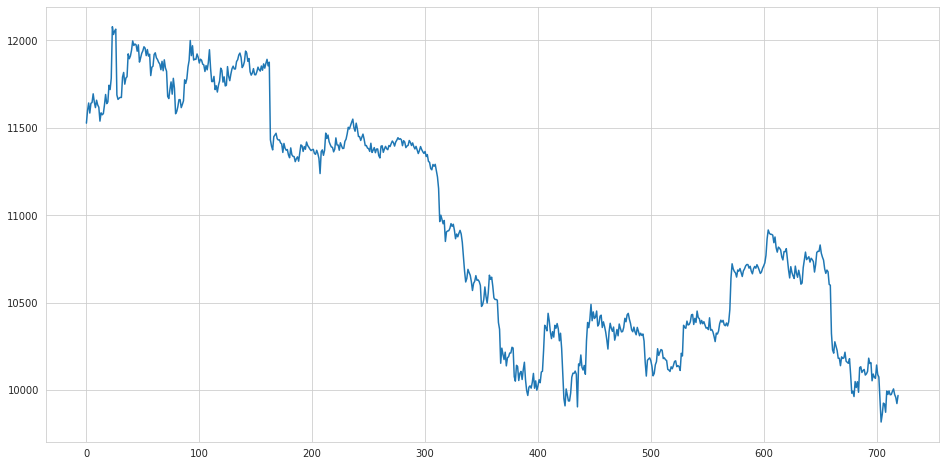

In [62]:
plt.figure(figsize=(16,8))
coins['BTCUSDT Close'].iloc[:720].plot()

In [32]:
SEQUENCE_LEN = 100
FUTURE_PERIOD_PREDICT = 5
RATIO_TO_PREDICT = 'BTCUSDT'

In [33]:
#i want to predict if in the next FUTURE_PERIOD_PREDICT
# the price will be higher than 1.25% of the current value
def classify(current_price, future_price):
    if future_price > (current_price + current_price*0.0125):
        return 1
    return 0

In [34]:
coins['Future Value'] = coins['BTCUSDT Close'].shift(-FUTURE_PERIOD_PREDICT)

In [35]:
"""
max_len = len(coins)
for i in range(0,max_len-SEQUENCE_LEN):
    current_max_price = coins['BTCUSDT High'][i]
    for x in range(i,i+SEQUENCE_LEN):
        if coins['BTCUSDT High'][x] > current_max_price:
            current_max_price = coins['BTCUSDT High'][x]
            coins['Future Value'].replace(x,current_max_price)"""

"\nmax_len = len(coins)\nfor i in range(0,max_len-SEQUENCE_LEN):\n    current_max_price = coins['BTCUSDT High'][i]\n    for x in range(i,i+SEQUENCE_LEN):\n        if coins['BTCUSDT High'][x] > current_max_price:\n            current_max_price = coins['BTCUSDT High'][x]\n            coins['Future Value'].replace(x,current_max_price)"

In [36]:
coins['Target'] = list(map(classify, coins['BTCUSDT High'], coins['Future Value']))

In [37]:
coins[ coins['Target'] ==0].count()[0]

4808

In [47]:
test = bf.get_data_by_intervals(20,currencies,bf.INTERVAL_1MINUTE)
test.to_csv('bitcoin_datasets/interval_1min.csv')

In [48]:
test = bf.get_data_by_intervals(20,currencies,bf.INTERVAL_5MINUTE)
test.to_csv('bitcoin_datasets/interval_5min.csv')

In [49]:
test = bf.get_data_by_intervals(20,currencies,bf.INTERVAL_15MINUTE)
test.to_csv('bitcoin_datasets/interval_15min.csv')

In [50]:
test = bf.get_data_by_intervals(20,currencies,bf.INTERVAL_30MINUTE)
test.to_csv('bitcoin_datasets/interval_30min.csv')

In [51]:
test = bf.get_data_by_intervals(20,currencies,bf.INTERVAL_1HOUR)
test.to_csv('bitcoin_datasets/interval_1hour.csv')

In [57]:
test = pd.read_csv('bitcoin_datasets/interval_30min.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9981 entries, 0 to 9980
Data columns (total 49 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            9981 non-null   int64  
 1   BTCUSDT Open Time                     9981 non-null   int64  
 2   BTCUSDT Open                          9981 non-null   float64
 3   BTCUSDT High                          9981 non-null   float64
 4   BTCUSDT Low                           9981 non-null   float64
 5   BTCUSDT Close                         9981 non-null   float64
 6   BTCUSDT Volume                        9981 non-null   float64
 7   BTCUSDT Close Time                    9981 non-null   int64  
 8   BTCUSDT Quote asset volume            9981 non-null   float64
 9   BTCUSDT n_trades                      9981 non-null   int64  
 10  BTCUSDT Taker buy base asset volume   9981 non-null   float64
 11  BTCUSDT Taker buy

In [53]:
test.head()

,Unnamed: 0,BTCUSDT Open Time,BTCUSDT Open,BTCUSDT High,BTCUSDT Low,BTCUSDT Close,BTCUSDT Volume,BTCUSDT Close Time,BTCUSDT Quote asset volume,BTCUSDT n_trades,...,XRPUSDT High,XRPUSDT Low,XRPUSDT Close,XRPUSDT Volume,XRPUSDT Close Time,XRPUSDT Quote asset volume,XRPUSDT n_trades,XRPUSDT Taker buy base asset volume,XRPUSDT Taker buy quote asset volume,XRPUSDT Ignore
0,0,1582574820000,9611.45,9614.55,9606.83,9611.98,18.756880,1582574879999,1.802643e+05,371,...,0.26839,0.26809,0.26835,85620.2,1582574879999,22967.834760,62,39304.5,10542.719117,0
1,1,1582574880000,9612.06,9615.00,9607.79,9608.33,13.089989,1582574939999,1.258000e+05,230,...,0.26847,0.26822,0.26842,35703.4,1582574939999,9583.150787,33,31262.3,8391.091718,0
2,2,1582574940000,9608.68,9625.00,9608.68,9621.14,30.507913,1582574999999,2.934128e+05,412,...,0.26883,0.26846,0.26876,159459.5,1582574999999,42832.997557,111,112597.3,30244.268426,0
3,3,1582575000000,9621.78,9629.50,9617.30,9624.52,32.393387,1582575059999,3.117623e+05,371,...,0.26899,0.26861,0.26870,91651.2,1582575059999,24633.609259,92,45816.1,12314.545948,0
4,4,1582575060000,9623.76,9644.44,9623.76,9641.44,115.041100,1582575119999,1.108744e+06,677,...,0.26903,0.26864,0.26895,135392.9,1582575119999,36406.887908,149,80801.7,21724.761582,0
